In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('facilities.csv')

In [109]:
data

,nyt_id,facility_name,facility_type,facility_city,facility_county,facility_county_fips,facility_state,facility_lng,facility_lat,latest_inmate_population,max_inmate_population_2020,total_inmate_cases,total_inmate_deaths,total_officer_cases,total_officer_deaths,note
0,D113AA95,Lee County jail,Jail,Opelika,Lee,1081,Alabama,-85.402336,32.624028,330,NaN,3,1,5,0.0,NaN
1,7B676BEF,Hamilton Aged and Infirmed prison,State facility,Hamilton,Marion,1093,Alabama,-87.992039,34.124593,269,NaN,48,14,41,0.0,NaN
2,8270BF4E,Hamilton Community Based Facility,State prison,Hamilton,Marion,1093,Alabama,-87.959788,34.143985,212,NaN,8,2,22,0.0,NaN
3,2F6B73F9,Riverbend Correctional Facility,State prison,Milledgeville,Baldwin,13009,Georgia,-83.219162,33.028045,1264,1429.0,18,3,0,0.0,NaN
4,161DFD77,Saint Clair Correctional Facility,State prison,Springville,St. Clair,1115,Alabama,-86.385651,33.746921,1102,NaN,106,16,58,0.0,NaN
5,7634779,Mountain View Correctional Facility,State prison,Charleston,Penobscot,23019,Maine,-69.101033,45.100405,316,NaN,7,1,7,0.0,NaN
6,EE41A107,Reception and Medical Center prison,State facility,Lake Butler,Union,12125,Florida,-82.367058,29.994512,1917,NaN,340,45,210,2.0,NaN
7,6165230,Jenkins Correctional Center,State prison,Millen,Jenkins,13165,Georgia,-81.924512,32.789701,925,993.0,31,4,0,0.0,NaN
8,A57E2828,Ware State Prison,State prison,Waycross,Ware,13299,Georgia,-82.395325,31.258610,1166,1492.0,32,4,64,0.0,NaN
9,9E28CD00,South Florida Reception Center prison,State prison,Doral,Miami-Dade,12086,Florida,-80.425543,25.807385,1466,NaN,210,26,201,0.0,NaN


In [110]:
data['inmate_case_density'] = data['total_inmate_cases']/data['latest_inmate_population']
data['inmate_mortality_rate'] = data['total_inmate_deaths'] / data['total_inmate_cases']

In [111]:
data.shape

(1503, 18)

In [112]:
data = data[data['inmate_mortality_rate']>0]

In [113]:
data = data.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [114]:
data.describe()

,facility_county_fips,facility_lng,facility_lat,latest_inmate_population,total_inmate_cases,total_inmate_deaths,total_officer_cases,inmate_case_density,inmate_mortality_rate
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,28586.780405,-90.177698,36.507366,1422.363176,510.366554,4.145270,101.726351,0.410971,0.018134
std,16256.959982,12.956771,4.855675,960.200197,504.772796,4.957605,125.026005,0.554766,0.030582
min,1005.000000,-157.899209,21.373508,6.000000,3.000000,1.000000,0.000000,0.009091,0.000465
25%,13092.500000,-96.712439,32.588844,786.750000,156.000000,1.000000,7.750000,0.145376,0.003748
50%,27163.000000,-86.654024,36.120068,1216.000000,354.500000,2.000000,75.500000,0.325715,0.008123
75%,44007.000000,-81.261048,40.491147,1824.500000,714.500000,5.000000,139.000000,0.582879,0.019325
max,56007.000000,-69.101033,48.503023,8616.000000,3108.000000,45.000000,1196.000000,11.333333,0.333333


In [115]:
data.corr()

,facility_county_fips,facility_lng,facility_lat,latest_inmate_population,total_inmate_cases,total_inmate_deaths,total_officer_cases,inmate_case_density,inmate_mortality_rate
facility_county_fips,1.000000,0.182448,0.185139,-0.096784,-0.139410,-0.085857,-0.152602,0.025987,-0.183526
facility_lng,0.182448,1.000000,0.155935,-0.302849,-0.420733,-0.087949,-0.369018,-0.083456,0.169036
facility_lat,0.185139,0.155935,1.000000,-0.133771,0.111008,-0.038085,0.067286,0.135349,-0.167582
latest_inmate_population,-0.096784,-0.302849,-0.133771,1.000000,0.581278,0.257774,0.529020,-0.139499,-0.145801
total_inmate_cases,-0.139410,-0.420733,0.111008,0.581278,1.000000,0.295388,0.500087,0.273703,-0.331572
total_inmate_deaths,-0.085857,-0.087949,-0.038085,0.257774,0.295388,1.000000,0.249972,0.045590,0.255704
total_officer_cases,-0.152602,-0.369018,0.067286,0.529020,0.500087,0.249972,1.000000,0.021083,-0.120799
inmate_case_density,0.025987,-0.083456,0.135349,-0.139499,0.273703,0.045590,0.021083,1.000000,-0.198711
inmate_mortality_rate,-0.183526,0.169036,-0.167582,-0.145801,-0.331572,0.255704,-0.120799,-0.198711,1.000000


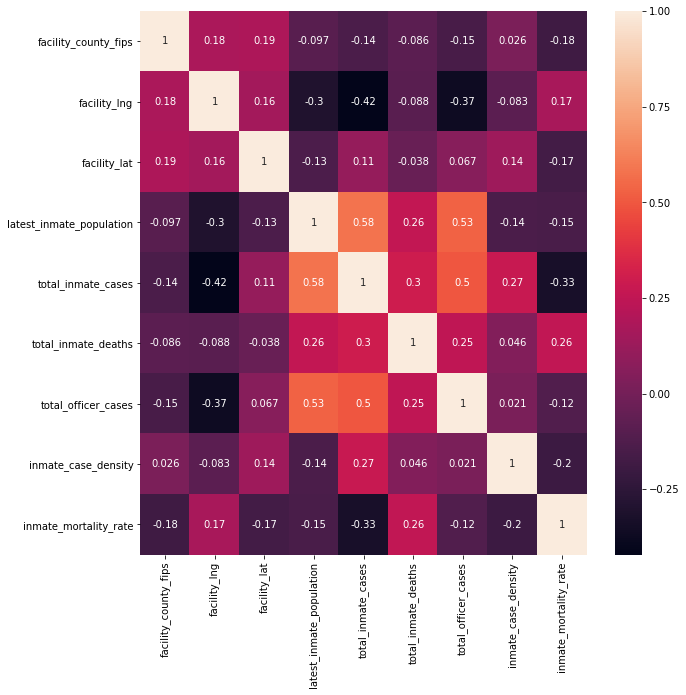

In [116]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(), annot=True, ax = ax)

In [117]:
data['inmate_case_density'].describe()

count    592.000000
mean       0.410971
std        0.554766
min        0.009091
25%        0.145376
50%        0.325715
75%        0.582879
max       11.333333
Name: inmate_case_density, dtype: float64

In [94]:
data['inmate_mortality_rate'].describe()

count    592.000000
mean       0.018134
std        0.030582
min        0.000465
25%        0.003748
50%        0.008123
75%        0.019325
max        0.333333
Name: inmate_mortality_rate, dtype: float64

In [129]:
from scipy.stats import pearsonr
x = data['inmate_case_density']
y = data['inmate_mortality_rate']
pearsonr(x, y)

(-0.1987114231983648, 1.097387419584238e-06)

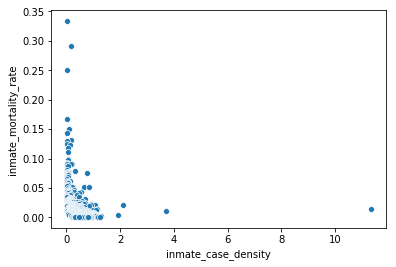

In [128]:
sns.scatterplot(x=x, y=y);

In [96]:
newdata = data[['inmate_case_density','inmate_mortality_rate']]
newdata

,inmate_case_density,inmate_mortality_rate
0,0.009091,0.333333
1,0.178439,0.291667
2,0.037736,0.250000
3,0.014241,0.166667
4,0.096189,0.150943
5,0.022152,0.142857
6,0.177360,0.132353
7,0.033514,0.129032
8,0.027444,0.125000
9,0.143247,0.123810


In [97]:
import statsmodels.api as sm
y = newdata['inmate_mortality_rate'] # dependent variable
x = newdata['inmate_case_density'] # independent variable
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     inmate_mortality_rate   R-squared:                       0.028
Model:                               OLS   Adj. R-squared:                  0.026
Method:                    Least Squares   F-statistic:                     16.89
Date:                   Tue, 18 Jan 2022   Prob (F-statistic):           4.52e-05
Time:                           04:47:36   Log-Likelihood:                 1144.0
No. Observations:                    592   AIC:                            -2286.
Df Residuals:                        591   BIC:                            -2282.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
inmate_case_density     0.0086      0.002      4.110      0.000       0.004       0.013
==============================================================================
Omnibus:                      602.989   Durbin-Watson:                   0.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28555.907
Skew:                           4.624   Prob(JB):                         0.00
Kurtosis:                      35.743   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
import numpy as np
np.corrcoef(newdata['inmate_case_density'],newdata['inmate_mortality_rate'])

array([[ 1.        , -0.19871142],
       [-0.19871142,  1.        ]])

(0, 1)

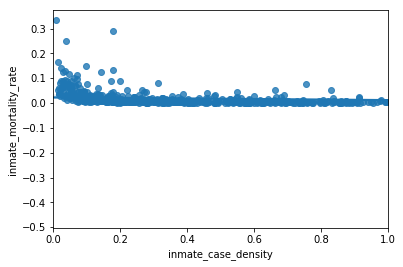

In [103]:
sns.regplot(x,y);
plt.xlim(0,1)